<a href="https://colab.research.google.com/github/FerminMendez/ModuleAI/blob/main/logistic_regresion_A01703366.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Regresión logistica para clasificar.

In [1]:
from google.colab import drive

drive.mount("/content/gdrive")
!pwd
#put your own path in google drive
%cd "/content/gdrive/MyDrive/DataSetIA"
!ls
import pandas as pd
import numpy as np

# The file has no names for columns.
columns = ["sepal length","sepal width","petal length","petal width", "class"]
df = pd.read_csv('iris.data',names = columns)
df.info()

Mounted at /content/gdrive
/content
/content/gdrive/MyDrive/DataSetIA
 Adult			 iris.data	       test.csv   train.csv
 gender_submission.csv	'Statistic Workshop'   Titanic	  wine.data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


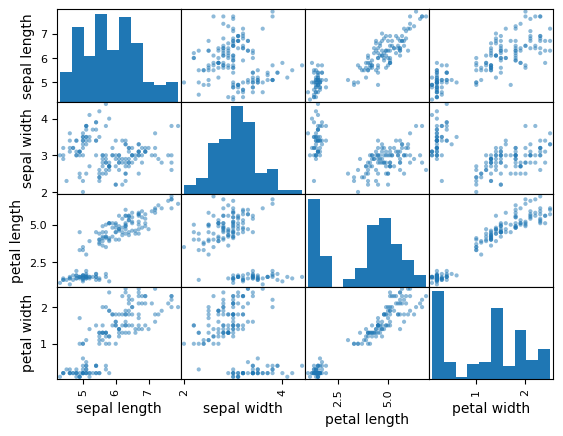

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

pd.plotting.scatter_matrix(df);

<ipython-input-3-b30ac082c369>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix =df.corr()


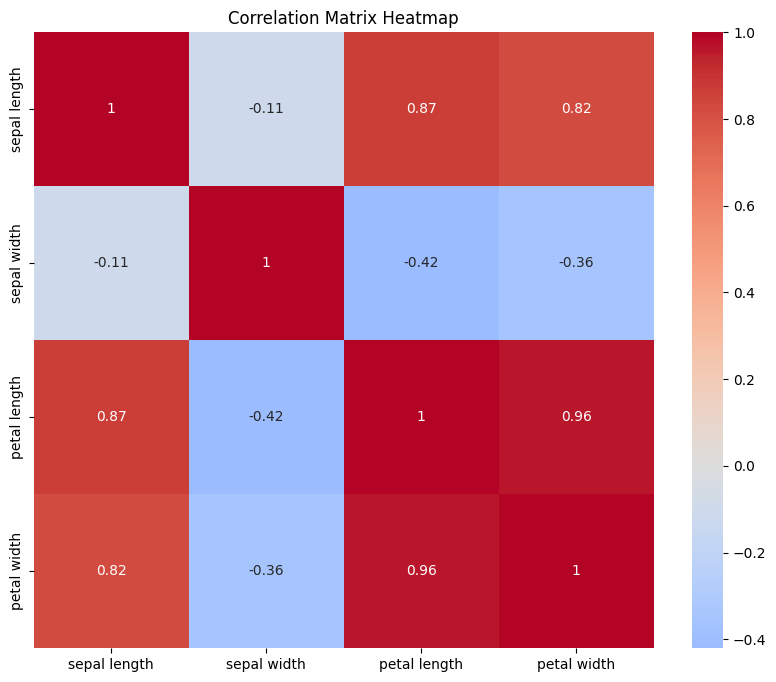

In [3]:
correlation_matrix =df.corr()

# Set up the heatmap figure
plt.figure(figsize=(10, 8))

# Create heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)

# Show the plot
plt.title("Correlation Matrix Heatmap")
plt.show()


In [4]:
class1='Iris-setosa'
class1='Iris-versicolor'
#class1='Iris-virginica'



#Eliminamos  sepal with
#df.drop(columns=['sepal width'])
target_col= df['class'].unique()
print(target_col)
df_e=pd.get_dummies(df,prefix='')
df_e= df_e.sample(frac = 1, random_state=5)


['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [5]:

#Define activation function = Sigmoid function
def actvfun(x):
   return 1 / (1 + np.exp(-x))

#Define cost function
def costfun(y_pred,y_real):
  #print("pred shape", type(y_pred), y_pred.shape)
  #print("real shape", type(y_real), y_real.shape)
  epsilon = 1e-15  # Small constant to prevent division by zero
  y_pred = np.clip(y_pred, epsilon, 1 - epsilon)  # Clip predictions to avoid log(0)
  ce = - np.sum(y_real * np.log(y_pred))
  return ce


In [6]:
# Add bias
num_rows=df.shape[0]
df.insert(loc = 0,column="ones",value = np.ones(num_rows).astype('float16'))

#Separate test and train

target_col= df['class'].unique()
df_e=pd.get_dummies(df,prefix='',prefix_sep='')
df_e= df_e.sample(frac = 1)
df_y_train=df_e[:-30][target_col]
df_x_train=df_e[:-30].drop(columns=target_col)
df_x_test=df_e[-30:].drop(columns=target_col)
df_y_test=df_e[-30:][target_col]


print(df_x_train.shape)

(120, 5)


In [7]:
print(df_y_train)

     Iris-setosa  Iris-versicolor  Iris-virginica
44             1                0               0
125            0                0               1
140            0                0               1
8              1                0               0
108            0                0               1
..           ...              ...             ...
18             1                0               0
144            0                0               1
20             1                0               0
50             0                1               0
106            0                0               1

[120 rows x 3 columns]


In [8]:
#Logistic Regresion model
#Define random hypotesis
num_params=df_x_train.shape[1]
currentParams=np.random.rand(num_params)




In [9]:

def updateParamsDesendentGradient(currentParams,df_x,df_y,alfa,periods):
  num_rows=df_x.shape[0]
  num_col=df_x.shape[1]

  debug=False
  if(debug):
    if(num_col==currentParams.size):
      print("params size correct")
    else:
      print("params size INCORRECT")
    if(df_y.shape[0]==num_rows):
      print("df_x and df_y size are CORRECT")
    else:
      print("df_x df_y size INCORRECT")

  delta=0.01
  const_alfa_m=alfa/num_rows #this is the part of [lr/m] in->   new_teta=teta- [lr/m]*gradient
  errors=list()
  #print("CP 1")
  for p in range(periods):
    temp=currentParams
    evaluated_h = df_x.dot(currentParams)
    #print(evaluated_h.shape)
    #Apply activation function in x to make the regresion logistic model
    evaluated_h = evaluated_h.apply(actvfun)
    #print("CP 2")
    diff=evaluated_h-df_y
    #print("CP 3")
    for i in range (num_col):
      x=diff.dot(df_x.iloc[:,i])
      temp[i]=currentParams[i]-const_alfa_m*x
    currentParamas=temp
    curr_error=costfun(evaluated_h,df_y)
    #print("Error %i is %f error"%(p,curr_error))
    errors.append(curr_error)
    if(curr_error)<delta:
      print("Repeated %i times to get %f error"%(p,delta))
      break
  print("Finished gradient iterations")
  return [currentParams,errors]

In [10]:
df_y=df_y_train[class1]
df_y

44     0
125    0
140    0
8      0
108    0
      ..
18     0
144    0
20     0
50     1
106    0
Name: Iris-versicolor, Length: 120, dtype: uint8

In [11]:
learning_rate=0.01
periods=30000
df_y=df_y_train[class1]
print(df_y.shape)
print(df_x_train)

[currentParams,errors]=updateParamsDesendentGradient(currentParams,df_x_train,df_y,learning_rate,periods)

(120,)
     ones  sepal length  sepal width  petal length  petal width
44    1.0           5.1          3.8           1.9          0.4
125   1.0           7.2          3.2           6.0          1.8
140   1.0           6.7          3.1           5.6          2.4
8     1.0           4.4          2.9           1.4          0.2
108   1.0           6.7          2.5           5.8          1.8
..    ...           ...          ...           ...          ...
18    1.0           5.7          3.8           1.7          0.3
144   1.0           6.7          3.3           5.7          2.5
20    1.0           5.4          3.4           1.7          0.2
50    1.0           7.0          3.2           4.7          1.4
106   1.0           4.9          2.5           4.5          1.7

[120 rows x 5 columns]
Repeated 0 times to get 0.010000 error
Finished gradient iterations


In [12]:
currentParams

array([0.2852644 , 0.94218517, 0.45618084, 0.20613562, 0.5452583 ])

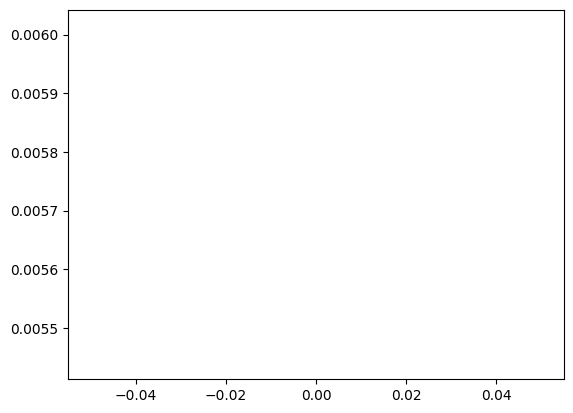

The current error is 0.005728


In [13]:
import matplotlib
from matplotlib.pyplot import*
plot(errors)
show()
print("The current error is %f"%errors[-1])

In [14]:
#Logistic prediction
def predict(params,df_x_test,df_y_test):
  predictions=df_x_test.dot(params)
  predictions=predictions.apply(actvfun)
  error=costfun(predictions,df_y)
  return [error,predictions]

[error_train,predictions_train]=predict(currentParams,df_x_train,df_y_train[class1])
[error_test,predictions_test]=predict(currentParams,df_x_test,df_y_test[class1])

print("error_train %f"%error_train)
print("error_test %f"%error_test)

error_train 0.008429
error_test -0.000000


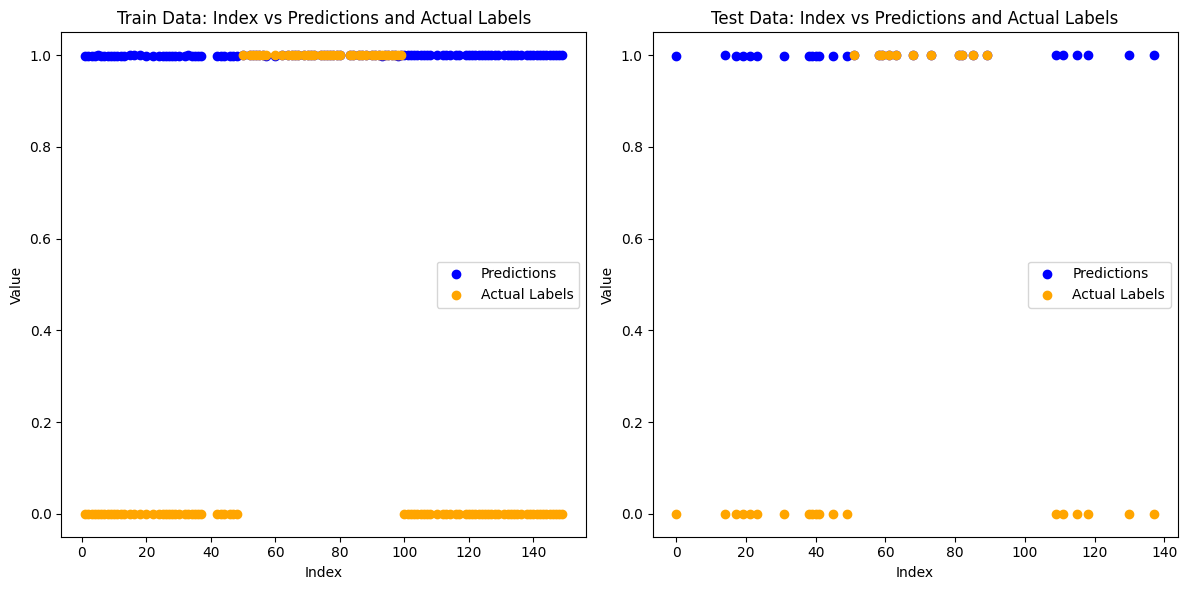

In [15]:
import matplotlib.pyplot as plt

# Assuming you have your df_x_train, predictions_train, df_y_train, df_x_test, predictions_test, and df_y_test calculated

# Create an array of indices for plotting
indices_train = df_x_train.index
indices_test = df_x_test.index

# Plotting the index of df_x_train versus predictions_train
plt.figure(figsize=(12, 6))

# Plot for train data
plt.subplot(1, 2, 1)
plt.scatter(indices_train, predictions_train, color='blue', label='Predictions')
plt.scatter(indices_train, df_y_train[class1], color='orange', label='Actual Labels')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Train Data: Index vs Predictions and Actual Labels')
plt.legend()

# Plot for test data
plt.subplot(1, 2, 2)
plt.scatter(indices_test, predictions_test, color='blue', label='Predictions')
plt.scatter(indices_test, df_y_test[class1], color='orange', label='Actual Labels')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Test Data: Index vs Predictions and Actual Labels')
plt.legend()

plt.tight_layout()
plt.show()


Una vez hemos comprobado que sirve para una clase hagamos el entrenamiento para las tres clases de una sola vez

In [ ]:
num_params=df_x_train.shape[1]

classes=target_col
params_class_1=np.random.rand(num_params)
params_class_2=np.random.rand(num_params)
params_class_3=np.random.rand(num_params)

classes=['Iris-versicolor','Iris-virginica','Iris-setosa']
df_y_1=df_y_train[classes[0]]
df_y_2=df_y_train[classes[1]]
df_y_3=df_y_train[classes[2]]

learning_rate=[0.05,0.05,0.03]
periods=[5000,10000,5000]
[params_class_1,errors_1]=updateParamsDesendentGradient(params_class_1,df_x_train,df_y_1,learning_rate[0],periods[0])
[params_class_2,errors_2]=updateParamsDesendentGradient(params_class_2,df_x_train,df_y_2,learning_rate[1],periods[1])
[params_class_3,errors_3]=updateParamsDesendentGradient(params_class_3,df_x_train,df_y_3,learning_rate[2],periods[2])

print(params_class_1)
print(params_class_2)
print(params_class_3)

print("The current error 1 is %f"%errors_1[-1])
print("The current error 2 is %f"%errors_2[-1])
print("The current error 3 is %f"%errors_3[-1])

In [ ]:

# Assuming you have your three error lists defined: error_1, error_2, error_3

# Create a figure with three subplots
plt.figure(figsize=(15, 10))

# Plot the first error list
plt.subplot(3, 1, 1)
plt.plot(errors_1, color='blue')
plt.ylabel('Error')
plt.title(str('Error de '+classes[0]))

# Plot the second error list
plt.subplot(3, 1, 2)
plt.plot(errors_2, color='orange')
plt.ylabel('Error')
plt.title(str('Error de '+classes[1]))
# Plot the third error list
plt.subplot(3, 1, 3)
plt.plot(errors_3, color='green')
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.title(str('Error de '+classes[2]))
plt.tight_layout()
plt.show()


In [ ]:
[error_train_1,predictions_train_1]=predict(params_class_1,df_x_train,df_y_train[classes[0]])
[error_test_1,predictions_test_1]=predict(params_class_1,df_x_test,df_y_test[classes[0]])
[error_train_2,predictions_train_2]=predict(params_class_2,df_x_train,df_y_train[classes[1]])
[error_test_2,predictions_test_2]=predict(params_class_2,df_x_test,df_y_test[classes[1]])
[error_train_3,predictions_train_3]=predict(params_class_3,df_x_train,df_y_train[classes[2]])
[error_test_3,predictions_test_3]=predict(params_class_3,df_x_test,df_y_test[classes[2]])

print("error_train %f"%error_train_1)
print("error_test %f"%error_test_1)

print("error_train %f"%error_train_2)
print("error_test %f"%error_test_2)

print("error_train %f"%error_train_3)
print("error_test %f"%error_test_3)

In [ ]:

# Create an array of indices for plotting
indices_train = df_x_train.index
indices_test = df_x_test.index

# Create a figure with six subplots (two for each class: train and test)
plt.figure(figsize=(18, 12))

# Plot for class 1 (train data)
plt.subplot(3, 2, 1)
plt.scatter(indices_train, predictions_train_1, color='blue', label='Predictions')
plt.scatter(indices_train, df_y_train[classes[0]], color='orange', label='Actual Labels')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title(str('Train Data: '+ classes[0] +'- Index vs Predictions and Actual Labels'))
plt.legend()

# Plot for class 1 (test data)
plt.subplot(3, 2, 2)
plt.scatter(indices_test, predictions_test_1, color='blue', label='Predictions')
plt.scatter(indices_test, df_y_test[classes[0]], color='orange', label='Actual Labels')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title(str('Test Data: '+ classes[0] +'- Index vs Predictions and Actual Labels'))
plt.legend()

# Plot for class 2 (train data)
plt.subplot(3, 2, 3)
plt.scatter(indices_train, predictions_train_2, color='blue', label='Predictions')
plt.scatter(indices_train, df_y_train[classes[1]], color='orange', label='Actual Labels')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title(str('Train Data: '+ classes[1] +'- Index vs Predictions and Actual Labels'))
plt.legend()

# Plot for class 2 (test data)
plt.subplot(3, 2, 4)
plt.scatter(indices_test, predictions_test_2, color='blue', label='Predictions')
plt.scatter(indices_test, df_y_test[classes[1]], color='orange', label='Actual Labels')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title(str('Test Data: '+ classes[1] +'- Index vs Predictions and Actual Labels'))
plt.legend()

# Plot for class Iris-virginica (train data)
plt.subplot(3, 2, 5)
plt.scatter(indices_train, predictions_train_3, color='blue', label='Predictions')
plt.scatter(indices_train, df_y_train[classes[2]], color='orange', label='Actual Labels')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title(str('Train Data: '+ classes[2] +'- Index vs Predictions and Actual Labels'))
plt.legend()

# Plot for class Iris-virginica (test data)
plt.subplot(3, 2, 6)
plt.scatter(indices_test, predictions_test_3, color='blue', label='Predictions')
plt.scatter(indices_test, df_y_test[classes[2]], color='orange', label='Actual Labels')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title(str('Test Data: '+ classes[2] +'- Index vs Predictions and Actual Labels'))
plt.legend()

plt.tight_layout()
plt.show()
